In [17]:
library(singscore)
library(tidyverse)
library(ggplot2)

In [18]:
# Set random seed so this part is reproducible
# https://www.random.org/ 2023-08-09
set.seed(3866) 

In [19]:
test_minmax <- read.table("../../../../data/expression/processed/response-subtype-test/V4//IO-Atlas-NSCLC-NSCLC-Response-Cluster-1-TPM-MinMaxNorm-TEST-2023-08-10-V4.tsv", 
                          sep='\t', 
                          row.names=1, 
                          header=T)

test_label <- read.table("../../../../data/expression/processed/response-subtype-test/V4/IO-Atlas-NSCLC-NSCLC-Response-Cluster-1-LABEL-TEST-2023-08-10-V4.tsv", 
                         sep='\t', 
                         row.names=1, 
                         header=F)

In [20]:
test_label

,V2
,<int>
SU2CLC-COL-1025-T1,1
SU2CLC-DFC-1007-T1,0
SU2CLC-MGH-1501-T1,0
SU2CLC-DFC-1534-T1,0
SU2CLC-MDA-1444-T1,0
SU2CLC-CLE-NIVO18-T1,0
SU2CLC-DFC-1002-T1,0
SU2CLC-DFC-DF0033-T1,0
SU2CLC-MGH-1575-T1,0


In [21]:
gs <- read.table("../../../../data/gs/IO-Atlas-NSCLC-NSCLC-Response-Cluster-1-TPM-MinMaxNorm-TRAIN-2023-08-10-V4-gene-sets.tsv",
                 sep='\t', 
                 header=T)

In [22]:
unique(gs$gs)

[1] "ratio-cluster-0" "ratio-cluster-1" "ratio-cluster-2"

In [23]:
cluster0_up <- gs %>% filter((gs == "ratio-cluster-0") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster0_dwn <- gs %>% filter((gs == "ratio-cluster-0") & (direction == "down")) %>% pull("gene") %>% unique()

cluster1_up <- gs %>% filter((gs == "ratio-cluster-1") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster1_dwn <- gs %>% filter((gs == "ratio-cluster-1") & (direction == "down")) %>% pull("gene") %>% unique()

cluster2_up <- gs %>% filter((gs == "ratio-cluster-2") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster2_dwn <- gs %>% filter((gs == "ratio-cluster-2") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster3_up <- gs %>% filter((gs == "ratio-cluster3") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster3_dwn <- gs %>% filter((gs == "ratio-cluster3") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster4_up <- gs %>% filter((gs == "ratio-cluster4") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster4_dwn <- gs %>% filter((gs == "ratio-cluster4") & (direction == "down")) %>% pull("gene") %>% unique()

In [24]:
rnk <- rankGenes(test_minmax)

In [25]:
cluster0score <- simpleScore(rnk, upSet = cluster0_up, downSet = cluster0_dwn)
cluster1score <- simpleScore(rnk, upSet = cluster1_up, downSet = cluster1_dwn)
cluster2score <- simpleScore(rnk, upSet = cluster2_up, downSet = cluster2_dwn)
#cluster3score <- simpleScore(rnk, upSet = cluster3_up, downSet = cluster3_dwn)
#cluster4score <- simpleScore(rnk, upSet = cluster4_up, downSet = cluster4_dwn)

cluster0score["response"] <- test_label
cluster1score["response"] <- test_label
cluster2score["response"] <- test_label
#cluster3score["response"] <- test_label
#cluster4score["response"] <- test_label

In [26]:
cluster0score

,TotalScore,TotalDispersion,UpScore,UpDispersion,DownScore,DownDispersion,response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SU2CLC.COL.1025.T1,0.28166370,5675.393,0.085059992,6526.405,0.1966037075,4824.380,1
SU2CLC.DFC.1007.T1,0.05239816,4808.813,0.044272293,4976.347,0.0081258645,4641.279,0
SU2CLC.MGH.1501.T1,0.14286893,5933.365,0.107603711,5211.339,0.0352652189,6655.391,0
SU2CLC.DFC.1534.T1,-0.15660883,6106.088,-0.048579069,6572.366,-0.1080297642,5639.810,0
SU2CLC.MDA.1444.T1,0.15275857,6003.418,0.007568525,7490.836,0.1451900451,4516.000,0
SU2CLC.CLE.NIVO18.T1,0.04739430,6665.770,0.062734427,5980.067,-0.0153401232,7351.472,0
SU2CLC.DFC.1002.T1,-0.25008723,5504.523,-0.184905174,4555.288,-0.0651820517,6453.758,0
SU2CLC.DFC.DF0033.T1,-0.25822742,5930.771,-0.128979252,7039.385,-0.1292481723,4822.157,0
SU2CLC.MGH.1575.T1,0.06020344,6818.107,0.060755797,5475.242,-0.0005523522,8160.972,0


In [27]:
t.test(cluster0score %>% filter(response==1) %>% pull("TotalScore"), cluster0score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster0score %>% filter(response == 1) %>% pull("TotalScore") and cluster0score %>% filter(response == 0) %>% pull("TotalScore")
t = 5.914, df = 5.393, p-value = 0.001517
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2092913 0.5190615
sample estimates:
 mean of x  mean of y 
 0.3200824 -0.0440940 


In [28]:
t.test(cluster1score %>% filter(response==1) %>% pull("TotalScore"), cluster1score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster1score %>% filter(response == 1) %>% pull("TotalScore") and cluster1score %>% filter(response == 0) %>% pull("TotalScore")
t = 0.89918, df = 1.3125, p-value = 0.5029
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.152221  1.471903
sample estimates:
mean of x mean of y 
0.4013229 0.2414820 


In [29]:
t.test(cluster2score %>% filter(response==1) %>% pull("TotalScore"), cluster2score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster2score %>% filter(response == 1) %>% pull("TotalScore") and cluster2score %>% filter(response == 0) %>% pull("TotalScore")
t = 3.596, df = 6.4319, p-value = 0.01014
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1199863 0.6061547
sample estimates:
mean of x mean of y 
0.5303839 0.1673134 


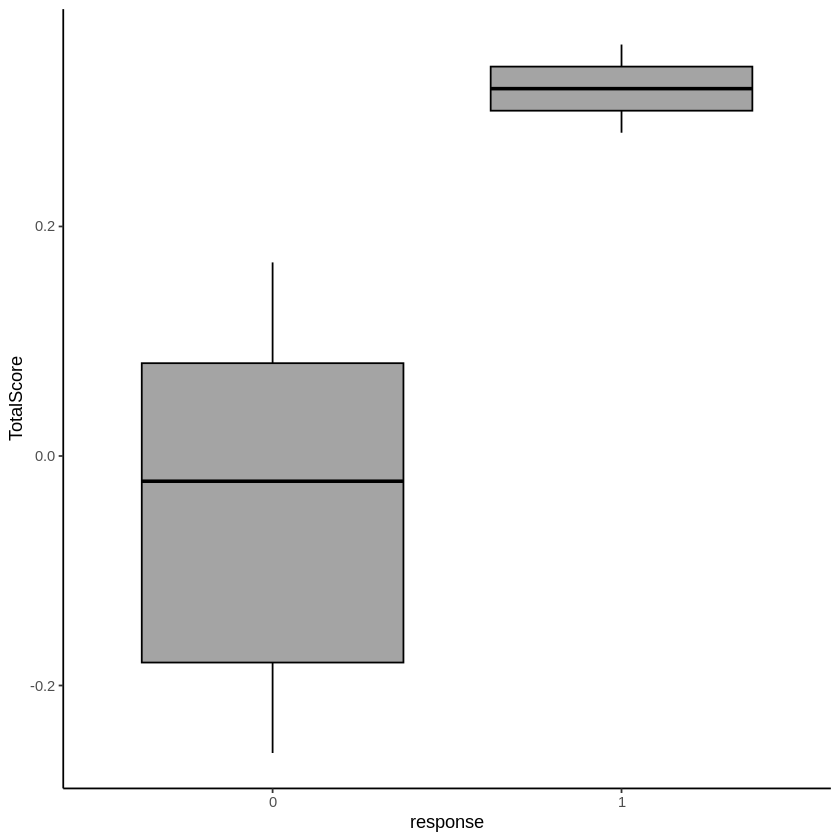

In [30]:
p<-ggplot(cluster0score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p

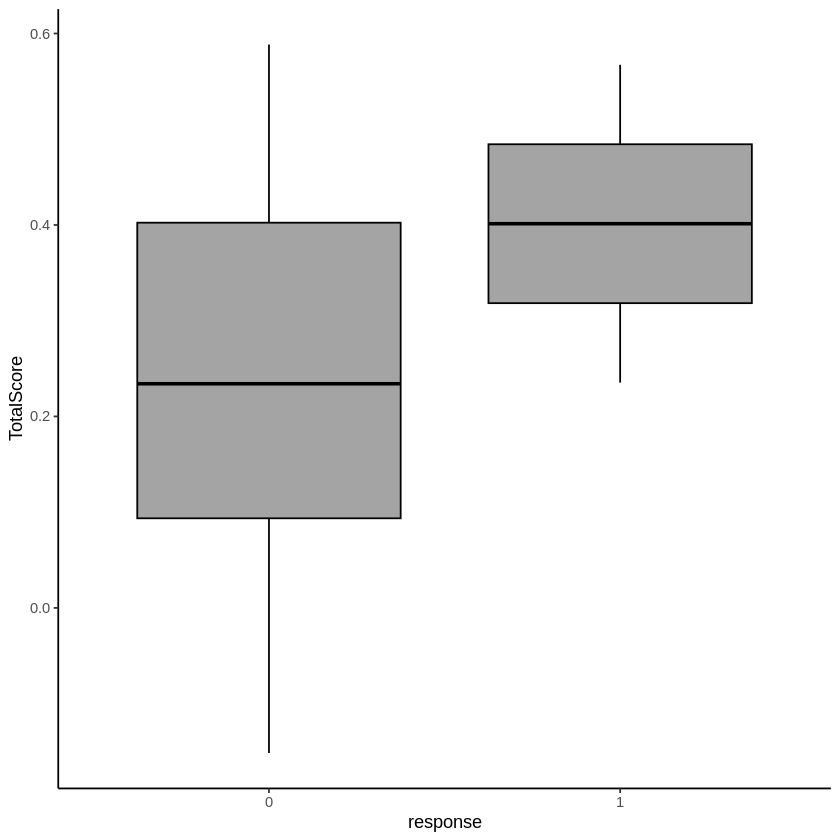

In [31]:
p<-ggplot(cluster1score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p

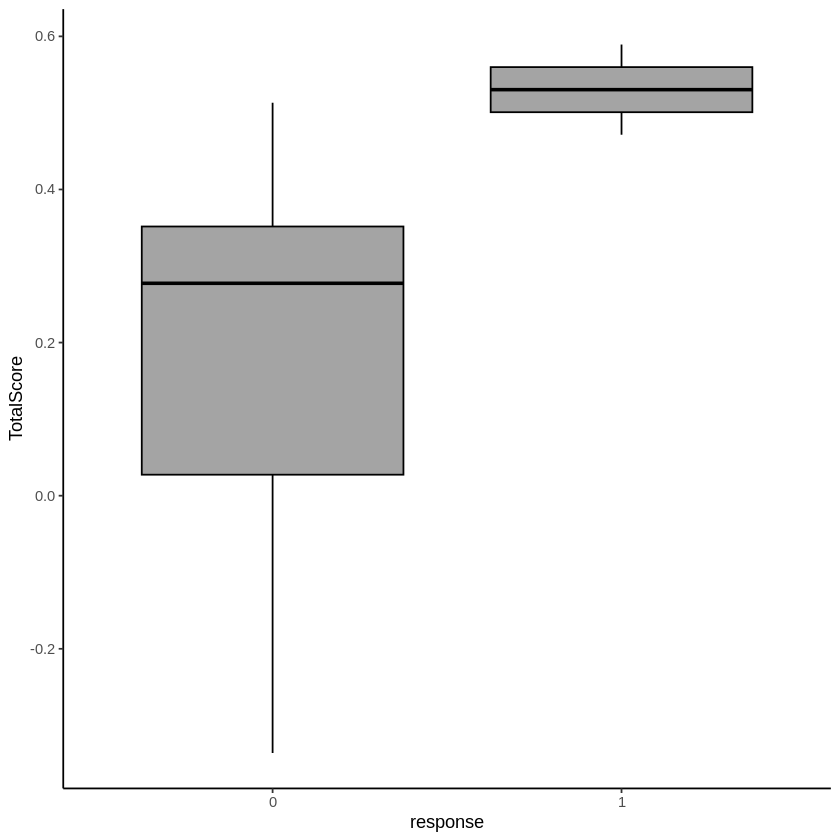

In [32]:
p<-ggplot(cluster2score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p